Value counts for each language:
 Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

Evaluating Naive Bayes (Scratch)...
Accuracy of Naive Bayes (Scratch): 0.9797


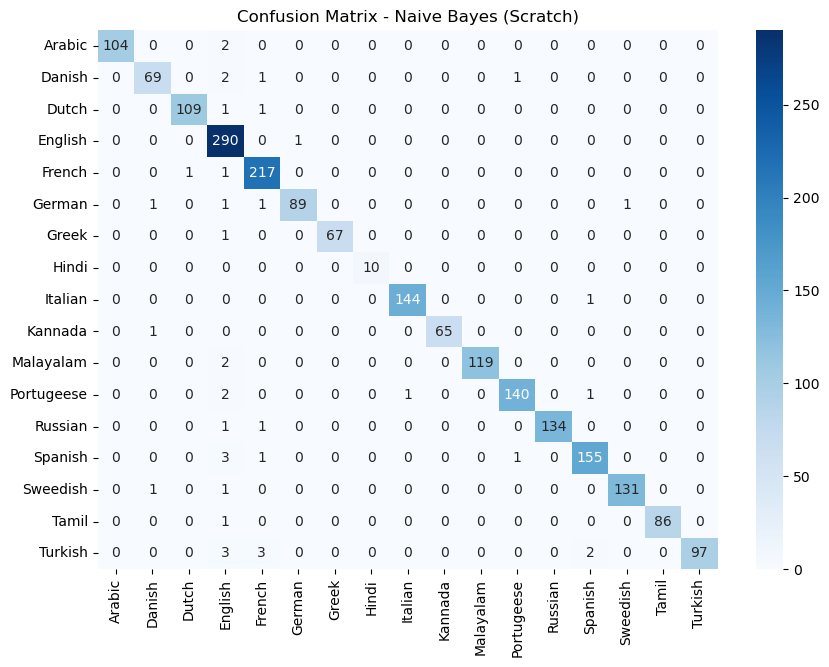


Evaluating Logistic Regression...
Accuracy of Logistic Regression: 0.9516


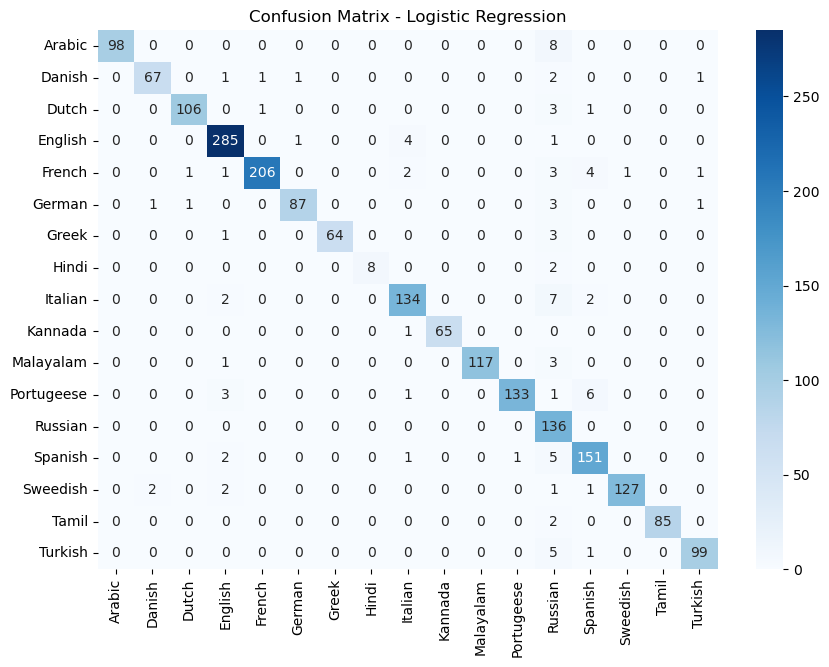


Evaluating Random Forest...
Accuracy of Random Forest: 0.9188


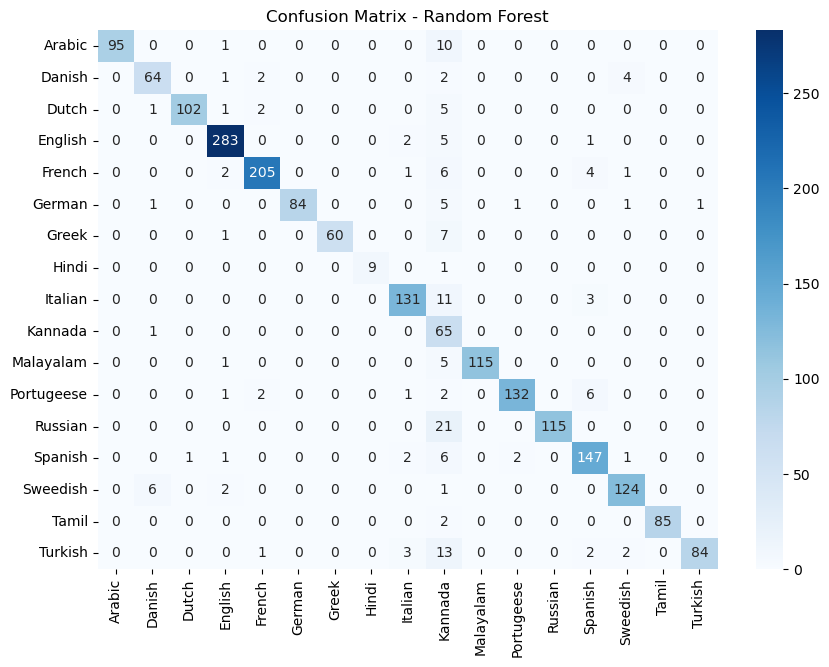


Testing prediction for English text:

Using Naive Bayes (Scratch):
Model Prediction: The language is English

Using Logistic Regression:
Model Prediction: The language is English

Using Random Forest:
Model Prediction: The language is English

Testing prediction for French text:

Using Naive Bayes (Scratch):
Model Prediction: The language is French

Using Logistic Regression:
Model Prediction: The language is French

Using Random Forest:
Model Prediction: The language is French

Testing prediction for Arabic text:

Using Naive Bayes (Scratch):
Model Prediction: The language is Arabic

Using Logistic Regression:
Model Prediction: The language is Arabic

Using Random Forest:
Model Prediction: The language is Arabic

Testing prediction for Spanish text:

Using Naive Bayes (Scratch):
Model Prediction: The language is Spanish

Using Logistic Regression:
Model Prediction: The language is Spanish

Using Random Forest:
Model Prediction: The language is Spanish

Testing prediction for Malayala

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

warnings.simplefilter("ignore")

# Loading the dataset
data = pd.read_csv("Language Detection.csv")

# Value count for each language
print("Value counts for each language:\n", data["Language"].value_counts())

# Separating the independent and dependent features
X = data["Text"]
y = data["Language"]

# Converting categorical variables to numerical
le = LabelEncoder()
y = le.fit_transform(y)

# Creating a list for appending the preprocessed text
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

# Creating bag of words using CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

# Train-test splitting
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Naive Bayes from Scratch
class NaiveBayesClassifier:
    def __init__(self):
        self.priors = None
        self.likelihoods = None
        self.classes = None
        self.feature_count = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        
        # Initialize priors and likelihoods2 
        self.priors = np.zeros(n_classes)
        self.likelihoods = np.zeros((n_classes, n_features))
        self.feature_count = np.zeros((n_classes, n_features))
        
        # Calculate priors and likelihoods
        for idx, label in enumerate(self.classes):
            X_c = X[y == label]
            self.priors[idx] = X_c.shape[0] / float(n_samples)
            self.feature_count[idx, :] = X_c.sum(axis=0)
            self.likelihoods[idx, :] = (self.feature_count[idx, :] + 1) / (X_c.sum() + n_features)
    
    def predict(self, X):
        return [self._predict_single(x) for x in X]
    
    def _predict_single(self, x):
        posteriors = []
        
        for idx, label in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            likelihood = np.sum(np.log(self.likelihoods[idx, :]) * x)
            posterior = prior + likelihood
            posteriors.append(posterior)
        
        return self.classes[np.argmax(posteriors)]

# Define models
models = {
    "Naive Bayes (Scratch)": NaiveBayesClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier()
}

# Function to train, evaluate, and print results for each model
def evaluate_model(model_name, model):
    print(f"\nEvaluating {model_name}...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    ac = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Accuracy of {model_name}: {ac:.4f}")
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Evaluate all models
for name, model in models.items():
    evaluate_model(name, model)

# Function for predicting language using a specific model
def predict_language(text, model):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print(f"Model Prediction: The language is {lang[0]}")

# Test predictions with each model
def test_predictions():
    texts = {
    "English": "The quick brown fox jumps over the lazy dog near the riverbank on a sunny day.",
    "French": "Le renard brun rapide saute par-dessus le chien paresseux près de la rivière par une journée ensoleillée.",
    "Arabic": "يقفز الثعلب البني السريع فوق الكلب الكسول بالقرب من ضفة النهر في يوم مشمس.",
    "Spanish": "El rápido zorro marrón salta sobre el perro perezoso cerca de la orilla del río en un día soleado.",
    "Malayalam": "വേഗമുള്ള ബ്രൗൺ നരി നദീതീരത്ത് ഒരു സണ്ണി ദിവസത്തിൽ മന്ദഗതിയിലുള്ള നായയെ ചാടുന്നു.",
    "Russian": "Быстрая коричневая лиса перепрыгивает через ленивую собаку у берега реки в солнечный день."
}

    
    for name, text in texts.items():
        print(f"\nTesting prediction for {name} text:")
        for model_name, model in models.items():
            print(f"\nUsing {model_name}:")
            predict_language(text, model)

test_predictions()
